In [ ]:
# @title libraries import

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import joblib


In [ ]:
# @title drive mount
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# @title read file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')

In [ ]:
df.head()


,problem_id,question,solutions,input_output,difficulty,url,starter_code
0,0,Polycarp has $n$ different binary words. A wor...,"[""for _ in range(int(input())):\n n = int(i...","{\n ""inputs"": [\n ""4\n4\n0001\n1000\n0011\...",interview,https://codeforces.com/problemset/problem/1259/D,NaN
1,1,Mikhail walks on a Cartesian plane. He starts ...,"[""q=int(input())\n\nfor e in range(q):\n x,...","{\n ""inputs"": [\n ""3\n2 2 3\n4 3 7\n10 1 9...",interview,https://codeforces.com/problemset/problem/1036/B,NaN
2,2,"You are given three sequences: $a_1, a_2, \ldo...","[""import sys\nimport random\nfrom fractions im...","{\n ""inputs"": [\n ""5\n3\n1 1 1\n2 2 2\n3 3...",interview,https://codeforces.com/problemset/problem/1408/A,NaN
3,3,"You have $n$ barrels lined up in a row, number...","[""def solve():\n n, k = map(int,input().spl...","{\n ""inputs"": [\n ""2\n4 1\n5 5 5 5\n3 2\n0...",interview,https://codeforces.com/problemset/problem/1430/B,NaN
4,4,"You are given a permutation $p=[p_1, p_2, \ldo...","[""for _ in range(int(input())):\n input()\n...","{\n ""inputs"": [\n ""3\n6\n4 5 1 3 2 6\n5\n5...",interview,https://codeforces.com/problemset/problem/1265/B,NaN


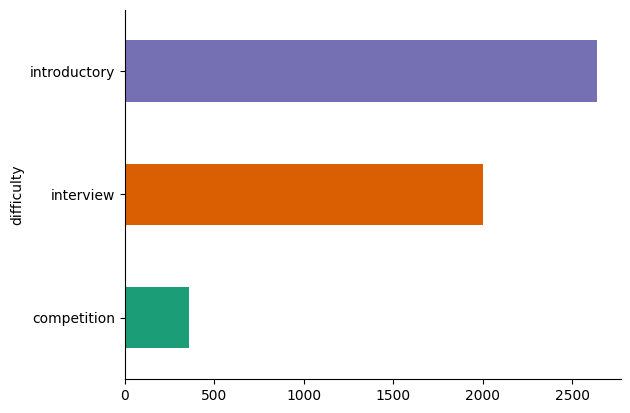

In [ ]:
# @title difficulty

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('difficulty').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

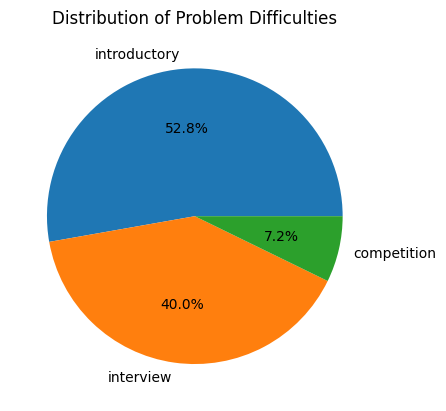

In [ ]:
# @title Distribution of Problem Difficulties

import matplotlib.pyplot as plt
import pandas as pd

df['difficulty'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
_ = plt.title('Distribution of Problem Difficulties')


In [ ]:
df.shape


(5000, 7)

In [ ]:
df['difficulty'].unique()


array(['interview', 'competition', 'introductory'], dtype=object)

In [ ]:
df.isnull().sum()


problem_id         0
question           0
solutions          0
input_output     195
difficulty         0
url                0
starter_code    1650
dtype: int64

In [ ]:
# @title Combine questions and codes for feature extraction
df['text'] = df['question'] + " " + df['solutions']

In [ ]:
df.head()

,problem_id,question,solutions,input_output,difficulty,url,starter_code,text
0,0,Polycarp has $n$ different binary words. A wor...,"[""for _ in range(int(input())):\n n = int(i...","{\n ""inputs"": [\n ""4\n4\n0001\n1000\n0011\...",interview,https://codeforces.com/problemset/problem/1259/D,NaN,Polycarp has $n$ different binary words. A wor...
1,1,Mikhail walks on a Cartesian plane. He starts ...,"[""q=int(input())\n\nfor e in range(q):\n x,...","{\n ""inputs"": [\n ""3\n2 2 3\n4 3 7\n10 1 9...",interview,https://codeforces.com/problemset/problem/1036/B,NaN,Mikhail walks on a Cartesian plane. He starts ...
2,2,"You are given three sequences: $a_1, a_2, \ldo...","[""import sys\nimport random\nfrom fractions im...","{\n ""inputs"": [\n ""5\n3\n1 1 1\n2 2 2\n3 3...",interview,https://codeforces.com/problemset/problem/1408/A,NaN,"You are given three sequences: $a_1, a_2, \ldo..."
3,3,"You have $n$ barrels lined up in a row, number...","[""def solve():\n n, k = map(int,input().spl...","{\n ""inputs"": [\n ""2\n4 1\n5 5 5 5\n3 2\n0...",interview,https://codeforces.com/problemset/problem/1430/B,NaN,"You have $n$ barrels lined up in a row, number..."
4,4,"You are given a permutation $p=[p_1, p_2, \ldo...","[""for _ in range(int(input())):\n input()\n...","{\n ""inputs"": [\n ""3\n6\n4 5 1 3 2 6\n5\n5...",interview,https://codeforces.com/problemset/problem/1265/B,NaN,"You are given a permutation $p=[p_1, p_2, \ldo..."


In [ ]:
# @title Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])

In [ ]:
# @title Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['difficulty'])

In [ ]:
# @title Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# @title Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# @title accuracy test

train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")


Training Accuracy: 0.93
Testing Accuracy: 0.86


In [ ]:
# @title Save the model and vectorizer
joblib.dump(model, 'model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [ ]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Load the model and vectorizer
model = joblib.load('model.pkl')
vectorizer = joblib.load('vectorizer.pkl')
label_encoder = joblib.load('label_encoder.pkl')

#@app.route('/predict', methods=['POST'])
"""def predict():
  data = request.json
  question = data['question']
  code = data['code']
  #question = df['question']
  #code = df['solutions']

    # Use make_prediction function
  level = make_prediction(question, code)

  return jsonify({'level': level})"""

def make_prediction(question, code):
    # Combine question and code for prediction
    input_text = question + " " + code

    # Vectorize the input
    X_new = vectorizer.transform([input_text])

    # Make a prediction
    prediction = model.predict(X_new)
    level = label_encoder.inverse_transform(prediction)

    return level[0]

In [ ]:
sample_question = "Solve the N-Queens problem"
sample_code = "def n_queens(n): ..."

"""sample_question = '''Given the head of a linked list, we repeatedly delete consecutive sequences of nodes that sum to 0 until there are no such sequences.
After doing so, return the head of the final linked list.  You may return any such answer.

(Note that in the examples below, all sequences are serializations of ListNode objects.)
Example 1:
Input: head = [1,2,-3,3,1]
Output: [3,1]
Note: The answer [1,2,1] would also be accepted.

Example 2:
Input: head = [1,2,3,-3,4]
Output: [1,2,4]

Example 3:
Input: head = [1,2,3,-3,-2]
Output: [1]


Constraints:

The given linked list will contain between 1 and 1000 nodes.
Each node in the linked list has -1000 <= node.val <= 1000.'''

#sample_code = ''' '''"""


# Call the prediction function
predicted_level = make_prediction(sample_question, sample_code)

print(f"Predicted Level: {predicted_level}")

Predicted Level: introductory
